In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
import keras
from tensorflow.keras import layers

# Loading the data

In [2]:
df = pd.read_csv(r'G:\Coding ninjas\Data Science & Machine Learning\Tests\Test 4\aapl-11193.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-06-18,6.468571,6.507143,6.333929,6.383929,5.489559,811468000
1,2008-06-19,6.376786,6.512143,6.314286,6.460714,5.555587,791949200
2,2008-06-20,6.405357,6.464286,6.250000,6.259643,5.382685,888367200
3,2008-06-23,6.240714,6.281429,6.127143,6.184286,5.317885,645780800
4,2008-06-24,6.156071,6.277857,6.129643,6.187500,5.320649,621947200
...,...,...,...,...,...,...,...
3268,2021-06-11,126.529999,127.440002,126.099998,127.349998,127.349998,53522400
3269,2021-06-14,127.820000,130.539993,127.070000,130.479996,130.479996,96906500
3270,2021-06-15,129.940002,130.600006,129.389999,129.639999,129.639999,62746300
3271,2021-06-16,130.369995,130.889999,128.460007,130.149994,130.149994,91815000


# Preparing the training data

In [3]:


train_len = int(len(df) * 0.8)
train_len

2618

In [4]:
df_train = df.iloc[0:train_len, :]
df_train.shape

(2618, 7)

In [5]:
df_test = df.iloc[train_len:, :]
df_test.shape

(655, 7)

In [6]:
Xtrain = df_train['Close'].values

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
#scaler = StandardScaler()
#scaler = RobustScaler()
Xtrain_sc = scaler.fit_transform(Xtrain.reshape(-1, 1))
len(Xtrain_sc)

2618

In [8]:
Xtrain_final = []
Ytrain_final = []
time_step = 60
for i in range(time_step, len(Xtrain_sc)):
    Xtrain_final.append(Xtrain_sc[i - time_step: i, 0])
    Ytrain_final.append(Xtrain_sc[i, 0])
    
Xtrain_final = np.array(Xtrain_final)
Ytrain_final = np.array(Ytrain_final)

In [9]:
Xtrain_final = Xtrain_final.reshape(Xtrain_final.shape[0], Xtrain_final.shape[1], 1)
Xtrain_final.shape

(2558, 60, 1)

# Building a model

In [10]:
model = keras.Sequential([
    
    layers.LSTM(units = 100, return_sequences = True, input_shape = (Xtrain_final.shape[1], 1)),
    layers.Dropout(0.2),
    
    layers.LSTM(units = 100, return_sequences = True),
    layers.Dropout(0.2),
    
    layers.LSTM(units = 100, return_sequences = True),
    layers.Dropout(0.2),
    
    layers.LSTM(units = 100, return_sequences = False),
    layers.Dropout(0.2),
    
    layers.Dense(units = 1)
])

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               8

In [11]:
hist = model.fit(Xtrain_final, Ytrain_final, epochs = 20, batch_size = 32)
hist

Epoch 1/20
80/80 [==============================] - 32s 191ms/step - loss: 0.0098
Epoch 2/20
80/80 [==============================] - 15s 192ms/step - loss: 0.0016
Epoch 3/20
80/80 [==============================] - 16s 195ms/step - loss: 0.0016
Epoch 4/20
80/80 [==============================] - 15s 181ms/step - loss: 0.0017
Epoch 5/20
80/80 [==============================] - 15s 185ms/step - loss: 0.0015
Epoch 6/20
80/80 [==============================] - 14s 180ms/step - loss: 0.0012
Epoch 7/20
80/80 [==============================] - 14s 174ms/step - loss: 0.0012
Epoch 8/20
80/80 [==============================] - 14s 174ms/step - loss: 0.0012
Epoch 9/20
80/80 [==============================] - 14s 175ms/step - loss: 0.0011
Epoch 10/20
80/80 [==============================] - 14s 175ms/step - loss: 0.0011
Epoch 11/20
80/80 [==============================] - 14s 175ms/step - loss: 0.0011
Epoch 12/20
80/80 [==============================] - 14s 177ms/step - loss: 0.0010
Epoch 13/20
8

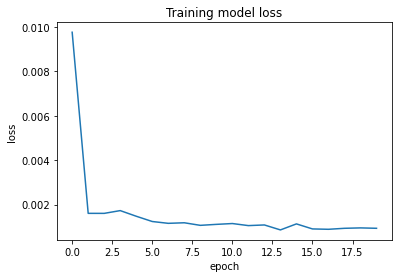

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [13]:
Ytrain_pred = model.predict(Xtrain_final)

80/80 [==============================] - 8s 65ms/step


In [14]:
Ytrain_pred = scaler.inverse_transform(Ytrain_pred)

In [15]:
Ytrain_actual = Xtrain[time_step: ]

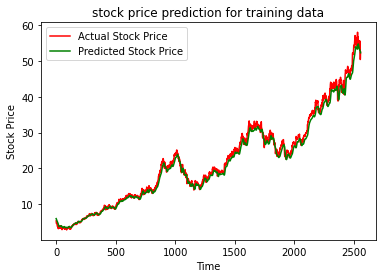

In [16]:
#plotting prediction for training data

plt.plot(Ytrain_actual, color = 'red', label = 'Actual Stock Price')
plt.plot(Ytrain_pred, color = 'green', label = 'Predicted Stock Price')
plt.title('stock price prediction for training data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Preparing the testing data

In [17]:
Xtest = df_test['Close'].values

In [18]:
Xtest_sc = scaler.transform(Xtest.reshape(-1, 1))
len(Xtest_sc)

655

In [19]:
Xtest_final = []

time_step = 60
for i in range(time_step, len(Xtest_sc)):
    Xtest_final.append(Xtest_sc[i - time_step: i, 0])
    
Xtest_final = np.array(Xtest_final)


In [20]:
Xtest_final = Xtest_final.reshape(Xtest_final.shape[0], Xtest_final.shape[1], 1)
Xtest_final.shape

(595, 60, 1)

In [21]:
Ypred = model.predict(Xtest_final)
Ypred

19/19 [==============================] - 1s 68ms/step


array([[0.6586783 ],
       [0.66733027],
       [0.67554724],
       [0.68263793],
       [0.6883261 ],
       [0.6925361 ],
       [0.6954142 ],
       [0.69717205],
       [0.6980951 ],
       [0.6985382 ],
       [0.6987082 ],
       [0.69888103],
       [0.6993301 ],
       [0.7001933 ],
       [0.7015085 ],
       [0.70307267],
       [0.7047986 ],
       [0.70667076],
       [0.7086239 ],
       [0.71048975],
       [0.7119714 ],
       [0.7129134 ],
       [0.71375203],
       [0.715019  ],
       [0.7170577 ],
       [0.7200718 ],
       [0.7241702 ],
       [0.7293432 ],
       [0.7352234 ],
       [0.74145424],
       [0.7481997 ],
       [0.755154  ],
       [0.7617239 ],
       [0.76726687],
       [0.77153575],
       [0.77454793],
       [0.7765621 ],
       [0.7779676 ],
       [0.7792901 ],
       [0.78096604],
       [0.78320014],
       [0.7860688 ],
       [0.7897049 ],
       [0.7939917 ],
       [0.7987472 ],
       [0.8035716 ],
       [0.80808413],
       [0.812

In [22]:
Ypred_trans = scaler.inverse_transform(Ypred)
Ypred_trans

array([[ 39.16813 ],
       [ 39.64593 ],
       [ 40.099712],
       [ 40.491295],
       [ 40.80542 ],
       [ 41.037918],
       [ 41.196857],
       [ 41.293934],
       [ 41.34491 ],
       [ 41.369377],
       [ 41.378765],
       [ 41.388313],
       [ 41.413113],
       [ 41.46078 ],
       [ 41.533413],
       [ 41.619793],
       [ 41.715107],
       [ 41.818497],
       [ 41.926357],
       [ 42.0294  ],
       [ 42.111225],
       [ 42.163246],
       [ 42.209557],
       [ 42.279526],
       [ 42.392113],
       [ 42.558563],
       [ 42.784897],
       [ 43.07057 ],
       [ 43.39531 ],
       [ 43.739403],
       [ 44.11192 ],
       [ 44.495968],
       [ 44.858788],
       [ 45.164898],
       [ 45.400642],
       [ 45.56699 ],
       [ 45.678223],
       [ 45.75584 ],
       [ 45.828873],
       [ 45.92143 ],
       [ 46.044807],
       [ 46.203224],
       [ 46.40403 ],
       [ 46.640766],
       [ 46.903385],
       [ 47.16981 ],
       [ 47.419014],
       [ 47.6

In [23]:
Ytest = Xtest[time_step: ]
Ytest

array([ 42.735001,  42.602501,  42.357498,  42.7225  ,  42.544998,
        42.700001,  42.605   ,  42.732498,  43.0075  ,  42.764999,
        43.2425  ,  43.557499,  43.5825  ,  43.717499,  43.287498,
        43.7425  ,  43.962502,  43.8825  ,  43.630001,  43.125   ,
        43.227501,  44.724998,  45.227501,  45.427502,  45.932499,
        46.529999,  47.005001,  46.6325  ,  47.040001,  48.772499,
        47.762501,  47.185001,  46.697498,  47.1175  ,  47.18    ,
        47.487499,  47.810001,  48.505001,  48.837502,  48.922501,
        49.25    ,  50.025002,  49.875   ,  50.154999,  49.737499,
        49.717499,  49.807499,  49.8125  ,  50.782501,  50.965   ,
        51.1325  ,  51.869999,  51.790001,  51.32    ,  51.075001,
        51.1525  ,  50.1675  ,  52.630001,  52.287498,  52.9375  ,
        52.119999,  50.715   ,  50.724998,  50.18    ,  49.294998,
        46.43    ,  47.165001,  47.73    ,  47.52    ,  47.25    ,
        45.772499,  46.650002,  45.695   ,  44.915001,  44.742

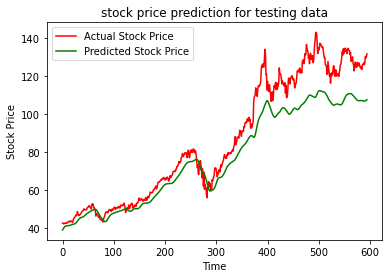

In [24]:
plt.plot(Ytest, color = 'red', label = 'Actual Stock Price')
plt.plot(Ypred_trans, color = 'green', label = 'Predicted Stock Price')
plt.title('stock price prediction for testing data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [25]:
Ytest.mean()

85.7977561630252

In [28]:
def score(Ytrue, Ypred):
    num = 0
    den = 0
    for i in range(len(Ytrue)):
        num += (Ytrue[i] - Ypred[i])**2
        den += (Ytrue[i] - Ytrue.mean())**2
    accuracy = 1 - (num/den)
    return accuracy
    

In [29]:
score(Ytest, Ypred_trans)     #accuracy is 85.03%

array([0.85036147], dtype=float32)